In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt



In [ ]:
import pandas as pd
data = pd.read_excel('/content/ecommerce retail.xlsx')

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
data['CustomerID'] = data['CustomerID'].astype(object)

In [ ]:
data['InvoiceNo'] = data['InvoiceNo'].astype(str)
data_filtered = data[(~data['InvoiceNo'].str.startswith('c')) & (data['Quantity']>0) & (data['UnitPrice']>0) & (data['Country']=='United Kingdom')]
data_final = data_filtered.dropna()
data_final

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [ ]:
data_final.loc[:,'total_price'] = data_final['Quantity'] * data_final['UnitPrice']

<ipython-input-29-860d2c8897a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.loc[:,'total_price'] = data_final['Quantity'] * data_final['UnitPrice']


In [ ]:
PRESENT = dt.datetime(2011,12,31)
data_final.loc[:, 'InvoiceDate'] = pd.to_datetime(data_final['InvoiceDate'])
rfm= data_final.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: num.count(),
                                        'total_price': lambda price: price.sum()}).reset_index()
rfm.columns=['customerID','recency','frequency','monetary']
rfm


,customerID,recency,frequency,monetary
0,12346.0,346,1,77183.60
1,12747.0,23,103,4196.01
2,12748.0,21,4595,33719.73
3,12749.0,24,199,4090.88
4,12820.0,24,59,942.34
...,...,...,...,...
3915,18280.0,298,10,180.60
3916,18281.0,201,7,80.82
3917,18282.0,28,12,178.05
3918,18283.0,24,756,2094.88


In [ ]:
rfm['r_score'] = pd.qcut(rfm['recency'],5,['5','4','3','2','1'])
rfm['f_score'] = pd.qcut(rfm['frequency'],5,['1','2','3','4','5'])
rfm['m_score'] = pd.qcut(rfm['monetary'],5,['1','2','3','4','5'])
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm

,customerID,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,12346.0,346,1,77183.60,1,1,5,115
1,12747.0,23,103,4196.01,5,4,5,545
2,12748.0,21,4595,33719.73,5,5,5,555
3,12749.0,24,199,4090.88,5,5,5,555
4,12820.0,24,59,942.34,5,4,4,544
...,...,...,...,...,...,...,...,...
3915,18280.0,298,10,180.60,1,1,1,111
3916,18281.0,201,7,80.82,1,1,1,111
3917,18282.0,28,12,178.05,5,1,1,511
3918,18283.0,24,756,2094.88,5,5,5,555


In [ ]:
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm

,customerID,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,12346.0,346,1,77183.60,1,1,5,115
1,12747.0,23,103,4196.01,5,4,5,545
2,12748.0,21,4595,33719.73,5,5,5,555
3,12749.0,24,199,4090.88,5,5,5,555
4,12820.0,24,59,942.34,5,4,4,544
...,...,...,...,...,...,...,...,...
3915,18280.0,298,10,180.60,1,1,1,111
3916,18281.0,201,7,80.82,1,1,1,111
3917,18282.0,28,12,178.05,5,1,1,511
3918,18283.0,24,756,2094.88,5,5,5,555


In [ ]:
segment_score = pd.read_excel('/content/Segment & RFM Scores.xlsx')
segment_score = segment_score.rename(columns={'RFM Score': 'rfm_score'})
segment_score['rfm_score'] = segment_score['rfm_score'].astype(str)
segment_score

,Segment,rfm_score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
125,Lost customers,151
126,Lost customers,151
127,Lost customers,151
128,Lost customers,151


In [ ]:
segment_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    130 non-null    object
 1   rfm_score  130 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
#segment_score['rfm_score'] = segment_score['rfm_score'].astype(str)

In [ ]:
rfm_results = pd.merge(rfm, segment_score, how='left', on='rfm_score')
rfm_results

,customerID,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment
0,12346.0,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12747.0,23,103,4196.01,5,4,5,545,Champions
2,12748.0,21,4595,33719.73,5,5,5,555,Champions
3,12749.0,24,199,4090.88,5,5,5,555,Champions
4,12820.0,24,59,942.34,5,4,4,544,Champions
...,...,...,...,...,...,...,...,...,...
3915,18280.0,298,10,180.60,1,1,1,111,Lost customers
3916,18281.0,201,7,80.82,1,1,1,111,Lost customers
3917,18282.0,28,12,178.05,5,1,1,511,New Customers
3918,18283.0,24,756,2094.88,5,5,5,555,Champions


In [ ]:
rfm_results = rfm_results[['customerID','Segment']]
rfm_results

,customerID,Segment
0,12346.0,Cannot Lose Them
1,12747.0,Champions
2,12748.0,Champions
3,12749.0,Champions
4,12820.0,Champions
...,...,...
3915,18280.0,Lost customers
3916,18281.0,Lost customers
3917,18282.0,New Customers
3918,18283.0,Champions


In [ ]:
segment = rfm_results.groupby('Segment').count()
segment = segment.rename(columns ={'customerID' : 'customer_count'})
segment

,customer_count
Segment,
About To Sleep,177
At Risk,386
Cannot Lose Them,78
Champions,722
Hibernating customers,720
Lost customers,388
Loyal,365
Need Attention,223
New Customers,271


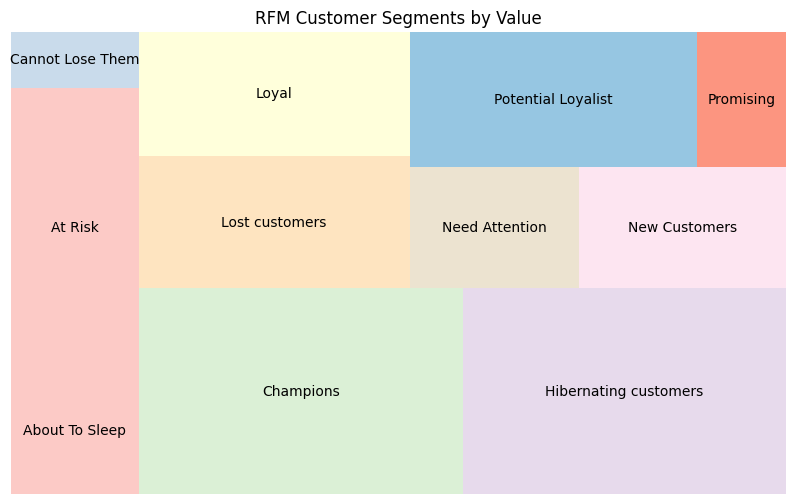

In [ ]:
!pip install squarify
import squarify
import matplotlib.pyplot as plt
import numpy as np
pastel_colors = plt.get_cmap('Pastel1')(np.linspace(0, 1, len(segment)))
potential_loyalist_color = plt.cm.Blues(0.5)
promising_color = plt.cm.Reds(0.5)

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
squarify.plot(sizes=segment['customer_count'],
              label=segment.index,
              color=[pastel_colors[i] if segment.index[i] != 'Potential Loyalist'
                     and segment.index[i] != 'Promising' else potential_loyalist_color if segment.index[i] == 'Potential Loyalist'
                     else promising_color for i in range(len(segment))],
              alpha=0.7)
plt.title('RFM Customer Segments by Value')
plt.axis('off')
plt.show()

In [ ]:
champions = rfm_results[rfm_results['Segment'] == 'Champions']
champions['r_score'].astype(object)
champions['f_score'].astype(object)
champions['m_score'].astype(object)
champions

,customerID,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment
1,12747.0,23,103,4196.01,5,4,5,545,Champions
2,12748.0,21,4595,33719.73,5,5,5,555,Champions
3,12749.0,24,199,4090.88,5,5,5,555,Champions
4,12820.0,24,59,942.34,5,4,4,544,Champions
9,12826.0,23,91,1474.72,5,4,4,544,Champions
...,...,...,...,...,...,...,...,...,...
3886,18237.0,23,61,987.10,5,4,4,544,Champions
3889,18241.0,30,104,2073.09,5,4,5,545,Champions
3891,18245.0,28,175,2567.06,5,5,5,555,Champions
3909,18272.0,23,166,3078.58,5,5,5,555,Champions


In [ ]:
data=champions[['r_score', 'f_score', 'm_score']]
print(type(champions[['r_score', 'f_score', 'm_score']]))

<class 'pandas.core.frame.DataFrame'>


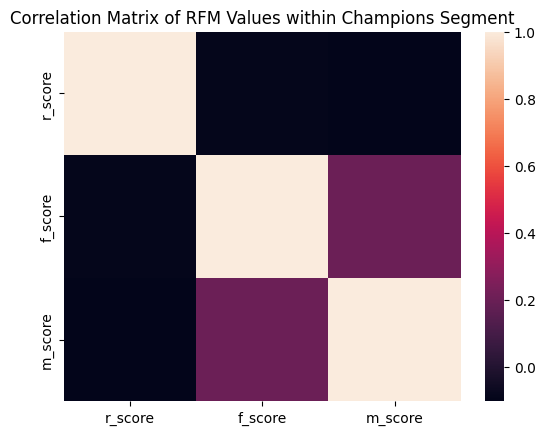

In [ ]:
correlation_matrix = champions[['r_score', 'f_score', 'm_score']].corr()

sns.heatmap(data = correlation_matrix)
plt.title('Correlation Matrix of RFM Values within Champions Segment')

plt.show()